# Visualize YOLO Inference

To make sure YOLO model is working correctly

In [1]:
import ultralytics
import os
from ultralytics import YOLO
import numpy as np
from PIL import Image, ImageDraw

/home/kindersc/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Setup

In [3]:
# Get the current working directory
current_directory = os.getcwd()

# Print the current working directory
print("Current Directory:", current_directory)

Current Directory: /home/kindersc/Documents/seg_paper/repos/detection_segmentation_v2/detection/visualization_notebooks


In [4]:
# # Specify the path to the directory you want to change to
# new_directory = '/projects/skinder@xsede.org/glaucoma_segmentation'

# # Change the current working directory to the new directory
# os.chdir(new_directory)

In [5]:
ultralytics.checks()

Ultralytics YOLOv8.1.9 🚀 Python-3.10.12 torch-2.1.2+cu121 CUDA:0 (NVIDIA GeForce RTX 4090 Laptop GPU, 16079MiB)
Setup complete ✅ (32 CPUs, 31.0 GB RAM, 420.1/458.0 GB disk)


## Load Model and Image

In [11]:
model = YOLO('best_stereoscopic.pt')

In [20]:
# Load the original image.
img_path = '/home/kindersc/Documents/glaucoma_datasets/yolo/working_structure/stereoscopic/images/test/binrushed_br1_image6prime.png'
image = Image.open(img_path)

## Make prediction

In [21]:
res = model(img_path)


image 1/1 /home/kindersc/Documents/glaucoma_datasets/yolo/working_structure/stereoscopic/images/test/binrushed_br1_image6prime.png: 640x640 1 opticnervehead, 14.8ms
Speed: 4.4ms preprocess, 14.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


## View original image

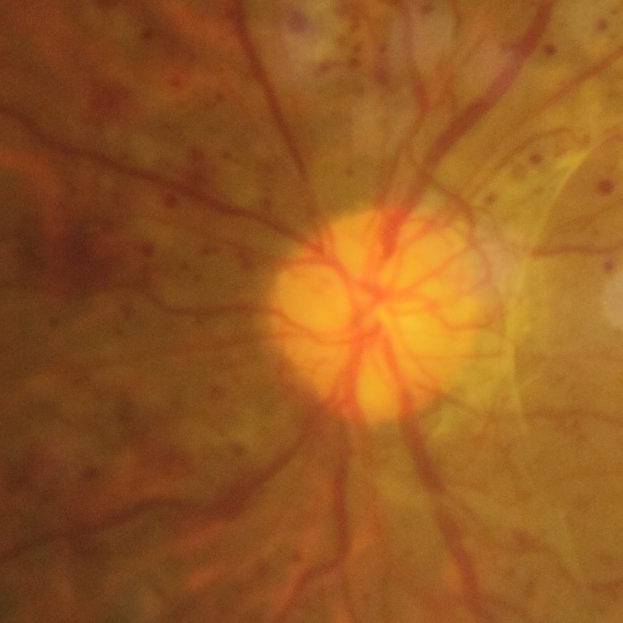

In [22]:
image

## View Bounding Box Overlay

In [23]:
def overlay_bounding_boxes(image, bounding_boxes):
    """Overlays the bounding boxes on the given image.

    Args:
    image: A PIL Image object representing the image.
    bounding_boxes: A NumPy array representing the bounding boxes.

    Returns:
    A PIL Image object representing the image with the bounding boxes overlaid.
    """

    # Convert the bounding boxes to PIL coordinates.
    bounding_boxes_pil = np.array([[box[0], box[1], box[2], box[3]] for box in bounding_boxes])

    # Create an ImageDraw object for the image.
    draw = ImageDraw.Draw(image)

    # Draw the bounding boxes on the image.
    for bounding_box in bounding_boxes_pil:
        draw.rectangle(bounding_box, outline=(0, 0, 255), width=2)

    # Return the image with the bounding boxes overlaid.
    return image

In [24]:
for box in res:
    bbox_confs = box.boxes.conf.cpu().numpy()
    print(box.boxes)
    # Overlay the bounding boxes on the image.
    bounding_boxes = box.boxes.xyxy.cpu().numpy()
    image_with_bounding_boxes = overlay_bounding_boxes(image.copy(), bounding_boxes)


ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0.], device='cuda:0')
conf: tensor([0.9169], device='cuda:0')
data: tensor([[268.3297, 204.3735, 485.8402, 422.4933,   0.9169,   0.0000]], device='cuda:0')
id: None
is_track: False
orig_shape: (623, 623)
shape: torch.Size([1, 6])
xywh: tensor([[377.0850, 313.4334, 217.5105, 218.1198]], device='cuda:0')
xywhn: tensor([[0.6053, 0.5031, 0.3491, 0.3501]], device='cuda:0')
xyxy: tensor([[268.3297, 204.3735, 485.8402, 422.4933]], device='cuda:0')
xyxyn: tensor([[0.4307, 0.3280, 0.7798, 0.6782]], device='cuda:0')


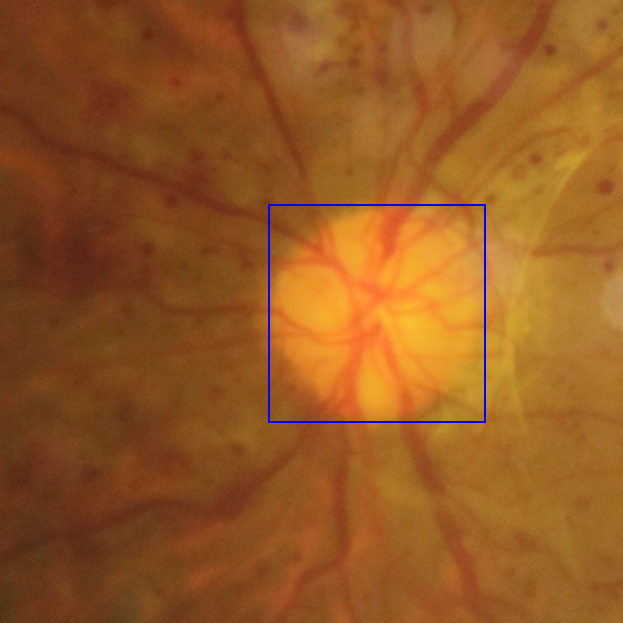

In [25]:
# Display the image with the bounding boxes overlaid.
image_with_bounding_boxes